#### Logistic Regression with Python using Titanic data

In [1]:
# adding some libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Data Dictionary, so we can understand better the columns info:
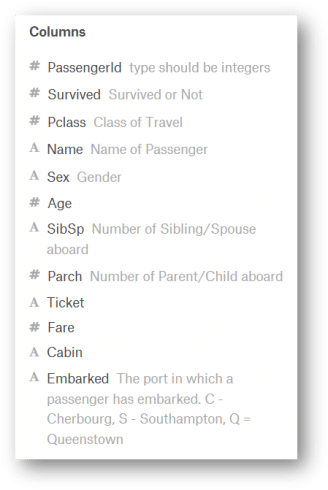


As we can see here, the ship was very big, so there must be a lot of people there, let’s see how many people:

In [5]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Ok, we can see 891 total. There are some null values for some columns, later we are going to deal with that.

Let’s see how many men and women were there:

In [6]:
train[train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [7]:
train[train['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

#### Let’s see how many people survived divided by class.

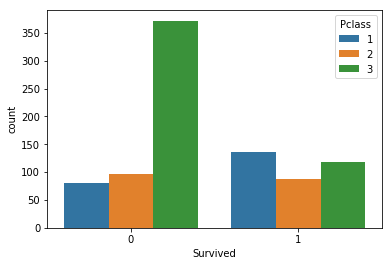

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train)

#### many people survived divided by sex.

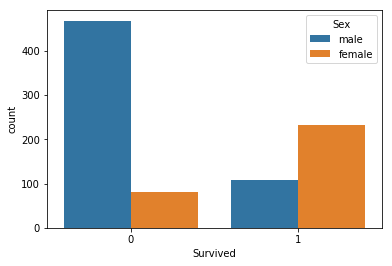

In [9]:
sns.countplot(x='Survived', hue='Sex', data=train)

 we have some null values for age. Let’s create a function to impute ages regarding the corresponding age average per class.



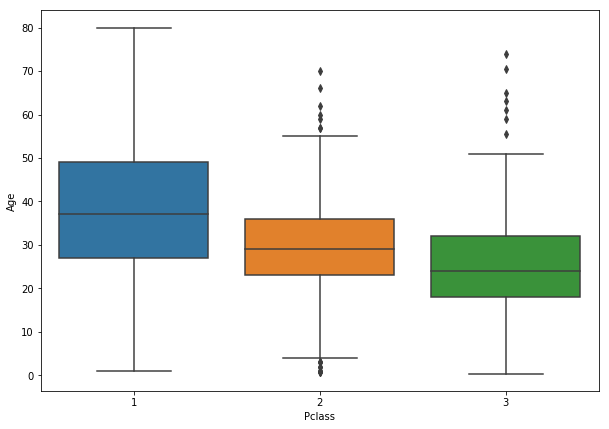

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

Let’s impute average age values to null age values:

In [11]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [13]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)

We have lots of null values for Cabin column, so we just remove it.

In [14]:
train.drop("Cabin",inplace=True,axis=1)

Finally, we remove some rows with null values:

In [15]:
train.dropna(inplace=True)

Ok, we are done with cleaning the data. We are going to convert some categorical data into numeric. For example, the sex column.

Let’s use the get_dummies function of Pandas. It will create two columns, one for male, one for female.

In [16]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


What we can do is to remove the first column because one column indicates the value of the other column.

For example, if the male is 1, then the female will be 0 and vice versa.

In [18]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

Let’s do the same for Embarked and PClass:

In [24]:
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)

We add these variables to the dataset:

In [26]:
train = pd.concat([train,pclass,sex,embarked],axis=1)

Then, we remove some columns that we are not going to use for our model.

In [27]:
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

Now our dataset is ready for the model.

X will contain all the features and y will contain the target variable

In [28]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

We will use train_test_split from cross_validation module to split our data. 70% of the data will be training data and %30 will be testing data.



In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Let’s use Logistic Regression to train the model:

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/ml/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let’s see how accurate is our model for predictions:

In [34]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.82      0.66      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.82      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



We got 81% accuraccy, not bad. Let’s see the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 35,  69]])

We still can improve our model, this tutorial is intended to show how we can do some exploratory analysis, clean up data, perform predictions 

Reff: https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/